# Replicate the results of this thesis on using Control Theory in Distributed Optimization
https://www.diva-portal.org/smash/get/diva2:1774688/FULLTEXT01.pdf

In [1]:
#Th is code s o l v e s t h e main problem o f t h e t h e s i s .
#I t implements d i s t r i b u te d op t im iza t ion and con trol .
import numpy as np
import matplotlib.pyplot as plt
plt.style.use([ "ggplot" ])
#Th is i s t h e f u n c t i o n d e s c r i b e d in a l g o r i t hm 3
def gradient_descent(x, beta=0.2, learning_rate =3,
epsilon =0.001):
    
    t = np.array( [ [ epsilon ] , [ epsilon ] ] )
    x_history = [t ,t ,t ,t , x[0] , x[1] , x[2] , x[3]]
    z_history = [t ,t ,t , t]

    #x_ij means coordinate i for node j

    ## x_21 means parameter 2 of agent 1

    x_11 , x_21= x[0][0] , x[0][1]
    x_12 , x_22= x[ 1 ][ 0 ] , x[ 1 ][ 1 ]
    x_13 , x_23= x[ 2 ][ 0 ] , x[ 2 ][ 1 ]
    x_14 , x_24= x[ 3 ][ 0 ] , x[ 3 ][ 1 ]
    z_11 , z_21 , z_12 ,z_22 , z_13 , z_23 , z_14 , z_24 = \
    0, 0, 0, 0, 0, 0, 0, 0

    for i in range (100):
        if np.linalg.norm(x_history[-4] - x_history[-8]) + \
            np.linalg.norm(x_history[-3] - x_history[-7]) + \
            np.linalg.norm(x_history[-2] - x_history[-6]) + \
            np.linalg.norm(x_history[-1] - x_history[-5]) \
                < epsilon: 
            break


        ## (## = from Andrei) 
        ## x_abc means difference in parameter "a" between agents "b" and "c"  

        x_112, x_212 = x_11 - x_12, x_21 - x_22
        x_114, x_214 = x_11 - x_14, x_21 - x_24
        x_123, x_223 = x_12 - x_13, x_22 - x_23
        x_134, x_234 = x_13 - x_14, x_23 - x_24
        z_112, z_212 = z_11 - z_12, z_21 - z_22
        z_114, z_214 = z_11 - z_14, z_21 - z_24
        z_123, z_223 = z_12 - z_13, z_22 - z_23
        z_134, z_234 = z_13 - z_14, z_23 - z_24

        # Updating x_ and z_ according to equation (8)

        y = x_14

        x_11 = x_11 - beta *( x_112 + x_114 ) - beta *( z_112+\
         z_114 ) - beta * learning_rate * (0.4 * x_11+0.2* x_21+1)
        
        x_21 = x_21 - beta *( x_212 + x_214 ) - beta *( z_212+\
            z_214 ) - beta * learning_rate * (0.4 * x_21 + \
             0.2 * ( x_112+x_12 ) + 8)


        x_12 = x_12 + beta *( x_112 - x_123 ) + beta *( z_112 -\
            z_123 ) - beta * learning_rate * (0.8 * x_12+0.3* x_22+1)
        
        x_22 = x_22 + beta *( x_212 - x_223 ) + beta *( z_212 -\
            z_223 ) - beta * learning_rate * (0.8 * x_22 + \
                0.3 * ( x_123+x_13 ) + 1)
        

        x_13 = x_13 + beta *( x_123 - x_134 ) + beta *( z_123 -\
            z_134 ) - beta * learning_rate * (0.6 * x_13+0.2* x_23+3)
        
        x_23 = x_23 + beta *( x_223 - x_234 ) + beta *( z_223 -\
            z_234 ) - beta * learning_rate * (0.4 * x_23 + \
                0.2 * ( x_134+x_14 ) + 1)
        

        x_14 = x_14 + beta *( x_114 + x_134 ) + beta *( z_114+\
            z_134 ) - beta * learning_rate *( x_14 + 0.2* x_24 + 5)
        
        x_24 = x_24 + beta *( x_214 + x_234 ) + beta *( z_214+\
            z_234 ) - beta * learning_rate * (0.4 * x_24 + \
                0.2* y + 1)
        

        z_11 = z_11 + beta *( x_112 + x_114 )
        z_21 = z_21 + beta *( x_212 + x_214 )
        z_12 = z_12 - beta *( x_112 - x_123 )
        z_22 = z_22 - beta *( x_212 - x_223 )
        z_13 = z_13 - beta *( x_123 - x_134 )
        z_23 = z_23 - beta *( x_223 + x_234 )
        z_14 = z_14 - beta *( x_114 + x_134 )
        z_24 = z_24 - beta *( x_214 + x_234 )
        
        for k in [ np.array( [ [ x_11 ] ,[ x_21 ]]) ,
        np.array( [ [ x_12 ] ,[ x_22 ]]) ,
        np.array( [ [ x_13 ] ,[ x_23 ]]) ,
        np.array( [ [ x_14 ] ,[ x_24 ] ] ) ]:
            x_history.append(k)

        for k in [ np.array( [ [ z_11 ] ,[ z_21 ]]) ,
        np.array( [ [ z_12 ] ,[ z_22 ]]) ,
        np.array( [ [ z_13 ] ,[ z_23 ]]) ,
        np.array( [ [ z_14 ] ,[ z_24 ]] )]:
            z_history.append(k)

    return x_history



x_1 = np.array( [ [ 0.0 ] , [ 0.0 ] ] )
x_2 = np.array( [ [ 0.0 ] , [ -5.0]])
x_3 = np.array([[ -8.0] , [ -3.0]])
x_4 = np.array( [ [ 5.0 ] , [ 10.0 ] ] )
x = [x_1, x_2, x_3, x_4 ]

x_history = gradient_descent(x)
m = len ( x_history )//4
print (m)
print ( x_history[ -1])
                  
#Choose wh ich node ’ s c o o r d i n a t e s t o p l o t by c h o o s i n g \
# j in {1 ,2 ,3 ,4}

j=1
x1_hat = np.array( [ x_history [4 * ( i +1)+ j -1][0] for i in range (m-1 )] , dtype=object )
x2_hat = np.array( [ x_history [4 * ( i +1)+ j -1][1] for i in range (m-1 )] , dtype=object )
x1_opt = np.array([ -1010/479 for i in range (m-1)], dtype=object )
x2_opt = np.array([ -2180/479 for i in range (m-1)],dtype=object )

82
[[[-2.10870317]]

 [[-4.55163857]]]


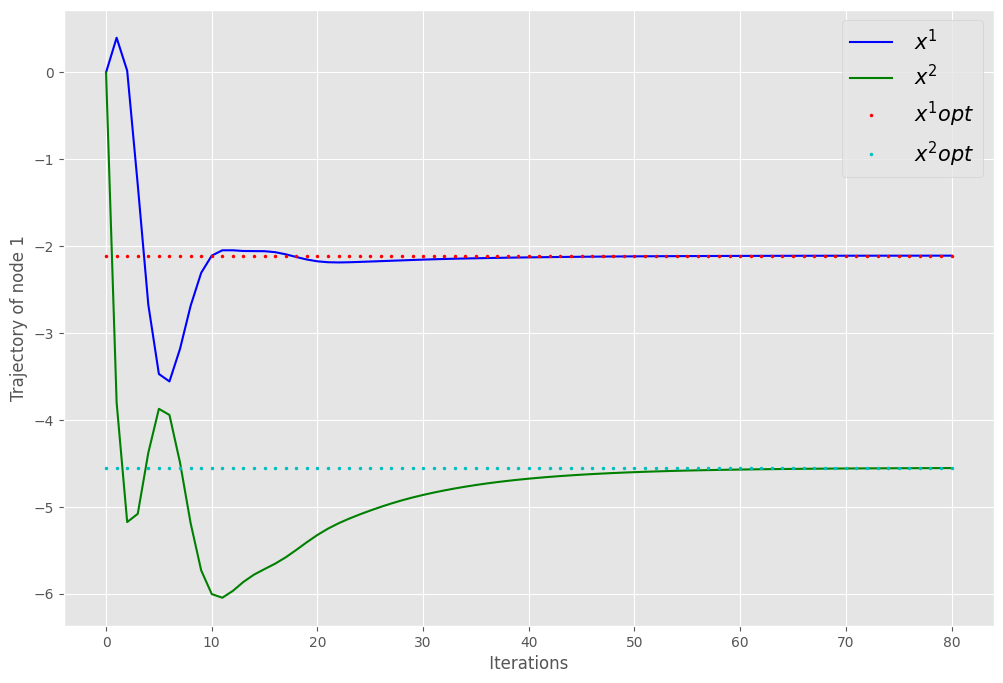

In [2]:
#Pl o t
fig , ax = plt.subplots( figsize =(12 ,8))
ax.set_ylabel( 'Trajectory of node 1')
ax.set_xlabel ( ' Iterations ')
ax.plot ( range (m-1), x1_hat , 'b' , x2_hat , 'g' , x1_opt ,
    '.' 'r' , x2_opt , '.''c' , markersize = 3)
plt.legend ([ ' $x^1$ ',' $x^2$ ',' $x^1 { opt }$ ', ' $x^2 { opt }$ '],
    fontsize =15)
plt.show ()